In [116]:
# citation: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
# citation: https://www.geeksforgeeks.org/how-to-reset-index-after-groupby-pandas/
# citation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
# citation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.codes.html

In [117]:
import pandas as pd
import datetime
import numpy as np
from math import radians, cos, sin, asin, sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### Our dataset comes from a study done at 3 different hospitals. The dataset uses numbers to represent and calculate the risk of developing a mental health disorder. For instance in the Ethnicity column 1 represents APPI, 2 represents Latinx and so on. Thus we have loaded in not only the data set but also the guide to assist in reading our code and results.

In [118]:
# loading our dataset
FILENAME = "Desktop/DS2500/HMHRS_replication_paper_data.csv"
HMHRS_df = pd.read_csv(FILENAME).dropna()
HMHRS_df

,study_id,illnessinjury,ER_5groups,HMHRS,HMHRSrisk,@2mosDone,MHsxs2m,MHsxs2m_level,langdone,age,...,stressed,strange_dss,phq6_badaboutself,nolove,pessimism,hypervigilant,notontop,GAD7_2m,PHQ8_2m,PTSDsxs_2m
1,2,1.0,4.0,1,0,1,60.0,1.0,1,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,27.0,17.0
2,3,1.0,3.0,5,0,1,19.0,0.0,1,58.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,8.0,8.0
4,5,2.0,4.0,17,1,1,78.0,1.0,1,37.0,...,1.0,1.0,0.0,3.0,1.0,0.0,2.0,11.0,22.0,45.0
5,6,2.0,4.0,35,1,1,65.0,1.0,1,52.0,...,3.0,2.0,4.0,4.0,4.0,4.0,4.0,17.0,14.0,34.0
6,7,1.0,4.0,3,0,1,4.0,0.0,1,63.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,9048,2.0,2.0,9,0,1,8.0,0.0,2,25.0,...,0.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,6.0,2.0
622,9049,2.0,2.0,3,0,1,0.0,0.0,2,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
623,9050,2.0,2.0,3,0,1,1.0,0.0,2,21.0,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0
626,9053,1.0,2.0,7,0,1,10.0,0.0,2,64.0,...,1.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,6.0,4.0


In [133]:
# Load guide for our data set
GUIDE = "Desktop/DS2500/HMHRS_data_dictionary.xlsx"
GUIDE_df = pd.read_excel(GUIDE).dropna()
GUIDE_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
53,Variable,Position,Label,Measurement Level,Role,Column Width,Alignment,Print Format,Write Format
54,study_id,1,STUDY ID (Wave 2),Scale,Input,11,Right,F6,F6
55,illnessinjury,2,Illness or Injury,Nominal,Input,12,Right,F8,F8
56,ER_5groups,3,"Ethnoracial group: AAPI, Black, Latinx, Multi+...",Nominal,Input,12,Right,F8,F8
57,HMHRS,4,HMHRS,Scale,Input,15,Right,F2,F2
58,HMHRSrisk,5,Risk level for HMHRS (10+),Nominal,Input,19,Right,F2,F2
59,@2mosDone,6,2-month follow-up completed?,Nominal,Input,14,Right,F2,F2
60,MHsxs2m,7,2-month Mental Health Symptoms: Sum of GAD-7 +...,Scale,Input,17,Right,F2,F2
61,MHsxs2m_level,8,2-month Mental Health Symptoms level: score of...,Nominal,Input,10,Right,F2,F2
62,langdone,9,Language,Nominal,Input,10,Right,F3,F3


#### Question - Which Race Was The Most and Least Represented in The Dataset?

In [120]:
'''
Calculating the total number of participants in each race group
'''
total_participants = len(HMHRS_df)
race_counts = HMHRS_df['ER_5groups'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']
# Calculating the proportion of each race group
race_counts['Proportion'] = race_counts['Count'] / total_participants
race_counts

,Race,Count,Proportion
0,4.0,147,0.344262
1,3.0,125,0.292740
2,2.0,81,0.189696
3,1.0,44,0.103044
4,5.0,30,0.070258


/var/folders/8j/3f9m22_n54b36b71xwfq3fzw0000gn/T/ipykernel_96781/1762837894.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Race',


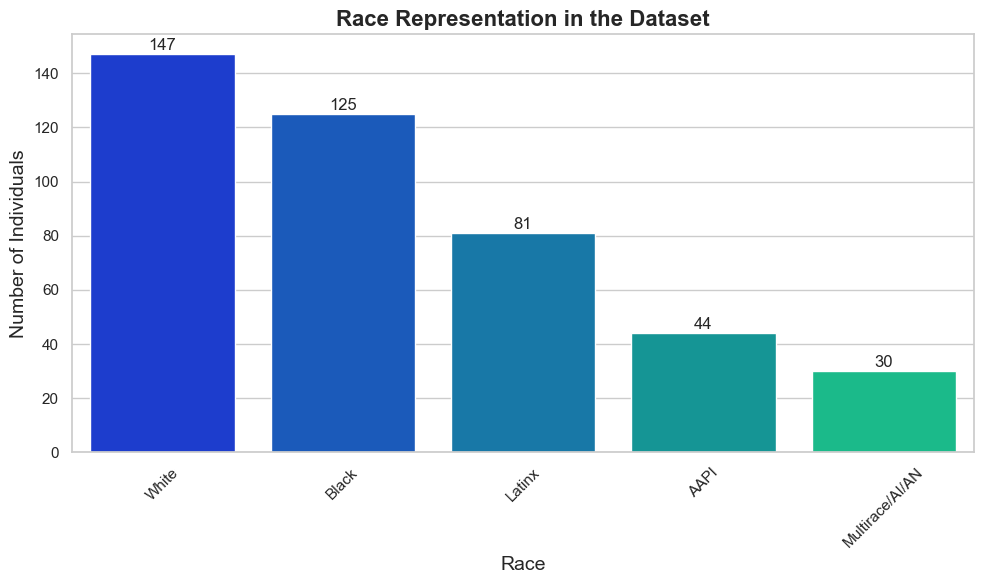

In [121]:
'''
First visualization answering the question 
"Which Race Was The Most and Least Represented in The Dataset?"
showing the total count for each race group.
'''
# Numbers correlated to race 
race_map = {1: 'AAPI', 2: 'Latinx', 3: 'Black', 4: 'White', 5: 'Multirace/AI/AN'}
# Total participants
total_participants = len(HMHRS_df)
HMHRS_df['Race'] = HMHRS_df['ER_5groups'].map(race_map)
race_counts = HMHRS_df['Race'].value_counts().reset_index()
race_counts.columns = ['Race', 'Count']
# Creating bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Race', 
                 y='Count', 
                 data=race_counts, 
                 palette='winter')
# Positioning, centering, formatting, and overall fixing visualization
for h in ax.patches:
    height = h.get_height()
    ax.text(
        h.get_x() + h.get_width() / 2,  
        height + 0.5, 
        f'{height:.0f}', 
        ha='center', va='bottom',
        fontsize=12 
    )
# Labeling and formatting of the visualization
plt.title("Race Representation in the Dataset", 
          fontsize=16, 
          fontweight='bold')
plt.xlabel("Race", fontsize=14)
plt.ylabel("Number of Individuals", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

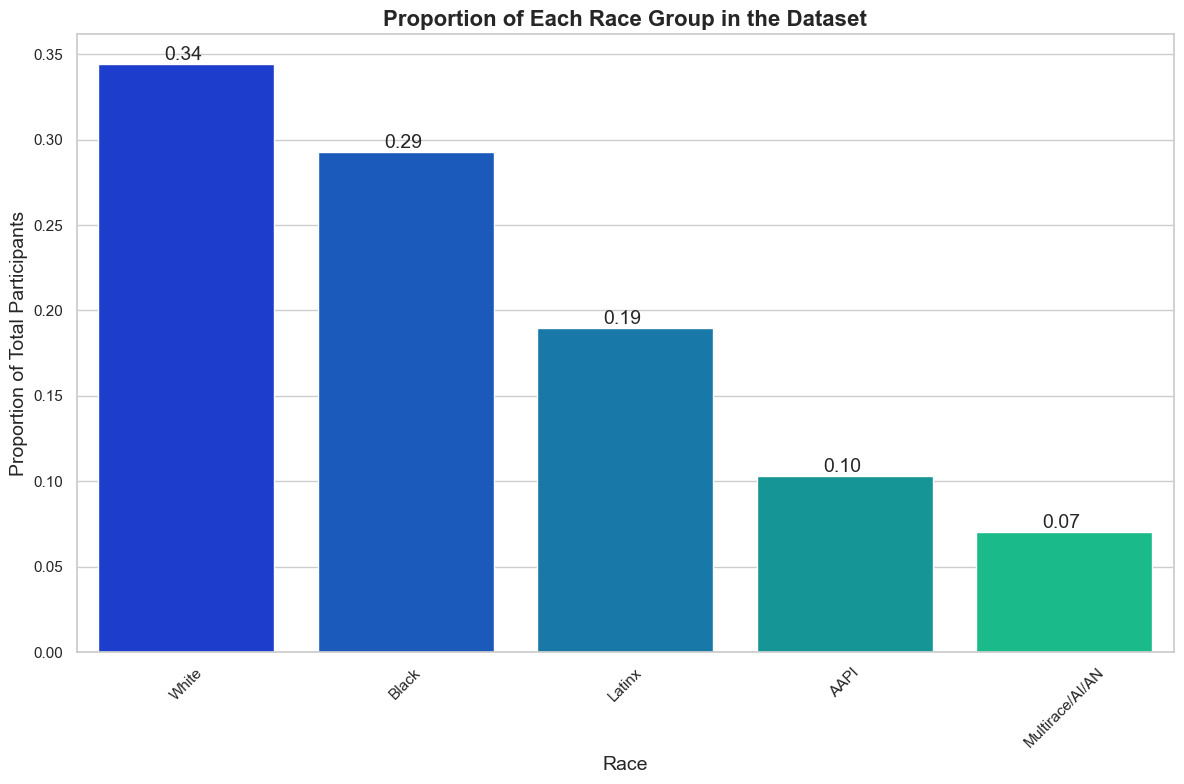

In [122]:
'''
Second visualization answering the question 
"Which Race Was The Most and Least Represented in The Dataset?"
showing the total count % for each race group.
'''
# Visualisation 2
# Numbers correlated to race
race_map = {1: 'AAPI', 2: 'Latinx', 3: 'Black', 4: 'White', 5: 'Multirace/AI/AN'}
# Calculating the total number of participants
total_participants = len(HMHRS_df)
# Calculating the count and proportion of each race group
race_counts = HMHRS_df['ER_5groups'].value_counts().reset_index()
race_counts.columns = ['Race_Code', 'Count']
race_counts['Proportion'] = race_counts['Count'] / total_participants
# Mapping the numeric race values to race labels
race_counts['Race'] = race_counts['Race_Code'].map(race_map)
# Create a bar plot of race proportions
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Race', y='Proportion', data=race_counts, palette='winter', hue='Race')
# Positioning, centering, formatting, and overall fixing visualization
for p in ax.patches: 
    height = p.get_height()  
    x_position = p.get_x() + p.get_width()  
    ax.text(x_position - 0.50, height + 0.00,  
            f'{height:.2f}', 
            ha='left', va='bottom',  
            fontsize=14)
# Labeling and formatting of the visualization
plt.title("Proportion of Each Race Group in the Dataset", fontsize=16, fontweight='bold')
plt.xlabel("Race", fontsize=14)
plt.ylabel("Proportion of Total Participants", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Question - Which Race Had The Most and Least Male/Representation in The Exam?

In [123]:
'''
Calculating the gender representation between race groups,
and calculation the female-to-male ratio by race
'''
# Create a new column with the gender labels 
gender_map = {1: 'Female', 2: 'Male', 3: 'Other'}
HMHRS_df['gender_label'] = HMHRS_df['gender'].map(gender_map)
# Group by ER_5groups (race) and gender
gender_counts = HMHRS_df.groupby(['ER_5groups', 'gender_label']).size().unstack(fill_value=0)
# Calculate the ratio of females to males for each racial group
if 'Female' in gender_counts.columns and 'Male' in gender_counts.columns:
   gender_counts['female_to_male_ratio'] = gender_counts['Female'] / gender_counts['Male']
else:
# In case there are no females or males in a group
    gender_counts['female_to_male_ratio'] = np.nan  
# Reset index for better readability
gender_counts = gender_counts.reset_index()
gender_counts

gender_label,ER_5groups,Female,Male,Other,female_to_male_ratio
0,1.0,22,21,1,1.047619
1,2.0,42,38,1,1.105263
2,3.0,85,40,0,2.125000
3,4.0,74,73,0,1.013699
4,5.0,21,9,0,2.333333


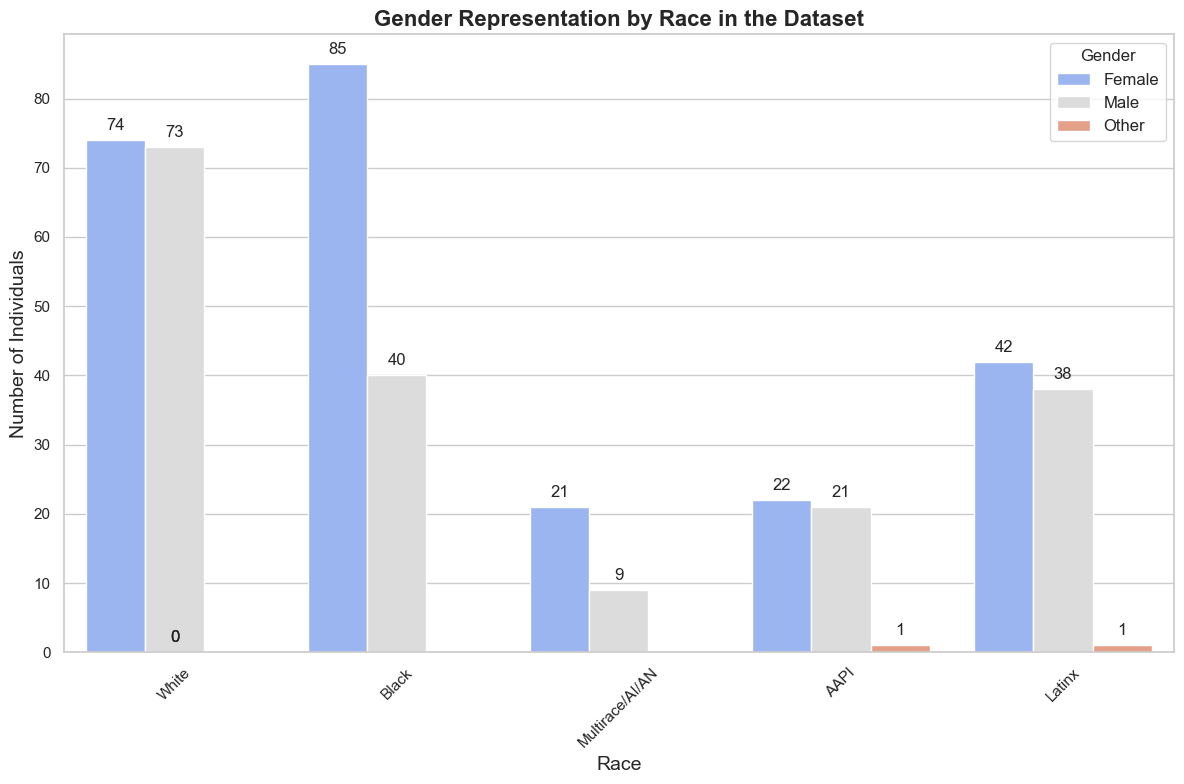

In [124]:
'''
First visualization answering the question 
"Which Race Had The Most and Least Male/Representation in The Exam?"
showing the total female-to-male gender representation by race group.
'''
# Mapping numeric race values to their corresponding race labels
race_map = {1: 'AAPI', 2: 'Latinx', 3: 'Black', 4: 'White', 5: 'Multirace/AI/AN'}
gender_map = {1: 'Female', 2: 'Male', 3: 'Other'}
# Map the numeric race values to race labels
HMHRS_df['Race'] = HMHRS_df['ER_5groups'].map(race_map)
HMHRS_df['Gender'] = HMHRS_df['gender'].map(gender_map)
# Creating the plot to visualize gender representation by race
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Race', 
                   hue='Gender', 
                   data=HMHRS_df, 
                   palette='coolwarm')
# positioning text in the center, formating, and overall visualization
for p in ax.patches:
    height = p.get_height()
    ax.text(
          p.get_x() + p.get_width() / 2,  
          height + 1,                    
          f'{height:.0f}',             
          ha='center', va='bottom',     
          fontsize=12 )
# Labeling and formatting of the visualization
plt.title('Gender Representation by Race in the Dataset', 
          fontsize=16, fontweight='bold')
plt.xlabel("Race", fontsize=14)
plt.ylabel("Number of Individuals", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender', fontsize=12)
plt.tight_layout()
# Display the plot
plt.show()

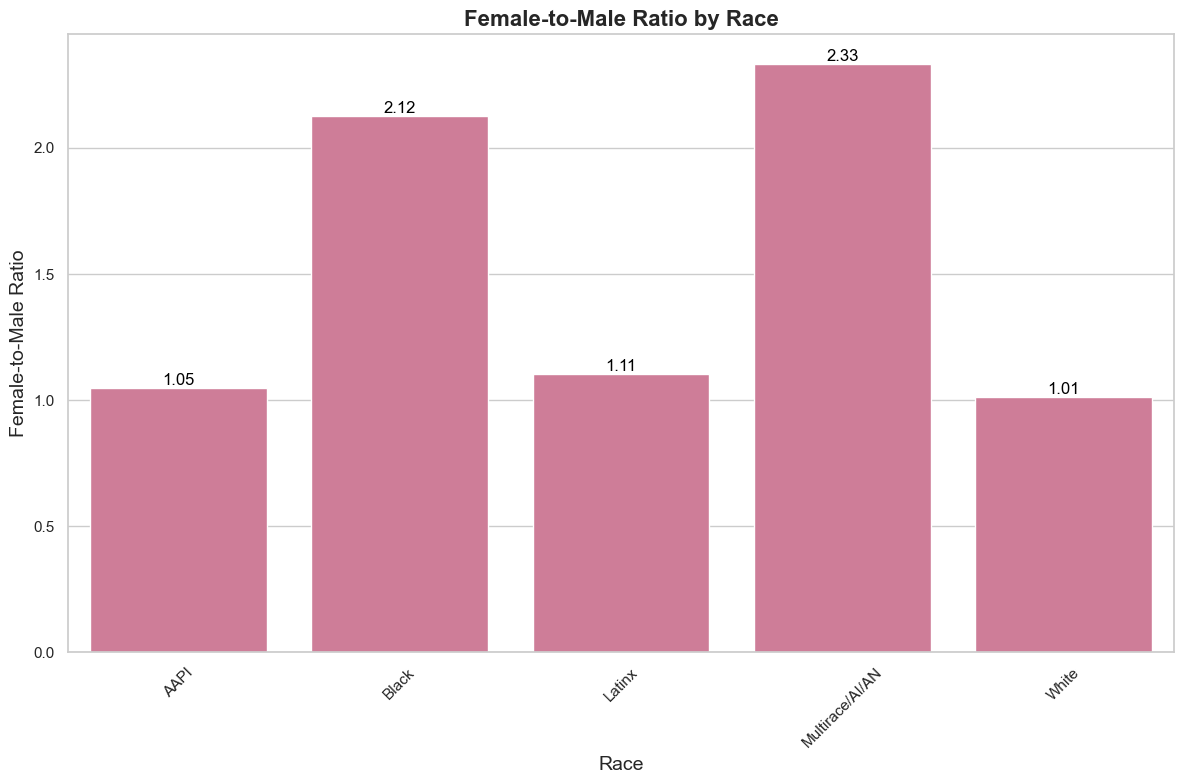

In [125]:
'''
Second visualization answering the question 
"Which Race Had The Most and Least Male/Representation in The Exam?"
showing the female-to-male ratio by race group
'''
race_map = {1: 'AAPI', 2: 'Latinx', 3: 'Black', 4: 'White', 5: 'Multirace/AI/AN'}
gender_map = {1: 'Female', 2: 'Male', 3: 'Other'}
# Mapping the numeric gender and race values to text labels
HMHRS_df['Race'] = HMHRS_df['ER_5groups'].map(race_map)
HMHRS_df['Gender'] = HMHRS_df['gender'].map(gender_map)
# Group by 'Race' and 'Gender' to calculate counts
gender_counts = HMHRS_df.groupby(['Race', 'Gender']).size().unstack(fill_value=0)
# Calculate the female-to-male ratio for each race group
gender_counts['female_to_male_ratio'] = gender_counts['Female'] / gender_counts['Male']
# Reset the index for better readability
gender_ratio_by_race = gender_counts.reset_index()
# Plot the bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=gender_ratio_by_race, 
                 x='Race', 
                 y='female_to_male_ratio', 
                 color='palevioletred')
# Labeling and formatting of the visualization
plt.title('Female-to-Male Ratio by Race', fontsize=16, fontweight='bold')
plt.xlabel('Race', fontsize=14)
plt.ylabel('Female-to-Male Ratio', fontsize=14)
plt.xticks(rotation=45)
# Positioning, centering, formatting, and overall fixing visualization
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, 
            height + 0.00,  
            f'{height:.2f}',  
            ha='center', 
            va='bottom', 
            fontsize=12, 
            color='black')
plt.tight_layout()
plt.show()

#### Question - How Can Income Play a Factor in Test Participation/Performance?

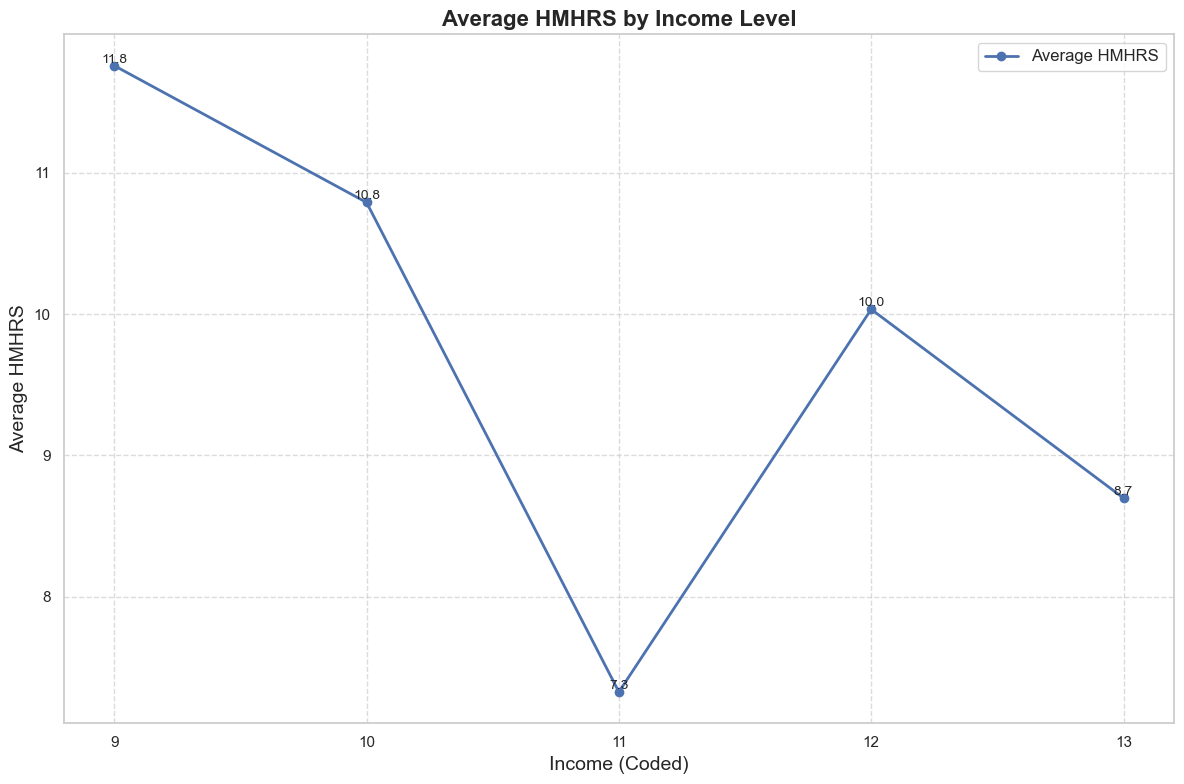

In [126]:
'''
Answering the question 
"How Can Income Play a Factor in Test Participation/Performance?"
showing the average HMHRS by income level.
'''
# Convertting the income_coded column from string to numeric values, 
# the empty values will be considered as NaN
HMHRS_df['income_coded'] = pd.to_numeric(HMHRS_df['income_coded'], errors='coerce')
# Compute average HMHRS by income level
average_hmhrs = HMHRS_df.groupby('income_coded')['HMHRS'].mean().reset_index()
# Sort data by income_coded
average_hmhrs = average_hmhrs.sort_values(by='income_coded')
# Plotting the line chart
plt.figure(figsize=(12, 8))
plt.plot(average_hmhrs['income_coded'], 
        average_hmhrs['HMHRS'], 
        marker='o', 
        linestyle='-', 
        linewidth=2, 
        color='b', 
        label='Average HMHRS')
# Positioning, centering, formatting, and overall fixing visualization
for i, row in average_hmhrs.iterrows():
     plt.text(row['income_coded'], 
            row['HMHRS'], 
            f"{row['HMHRS']:.1f}", 
            ha='center', 
            va='bottom', 
            fontsize=10)
# Labeling and formatting of the visualization
plt.title("Average HMHRS by Income Level", fontsize=16, fontweight='bold')
plt.xlabel("Income (Coded)", fontsize=14)
plt.ylabel("Average HMHRS", fontsize=14)
plt.xticks([9, 10, 11, 12, 13])
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#### Question - How Does the Feeling of “Not Being on Top of Things” Vary by Socioeconomic Status?

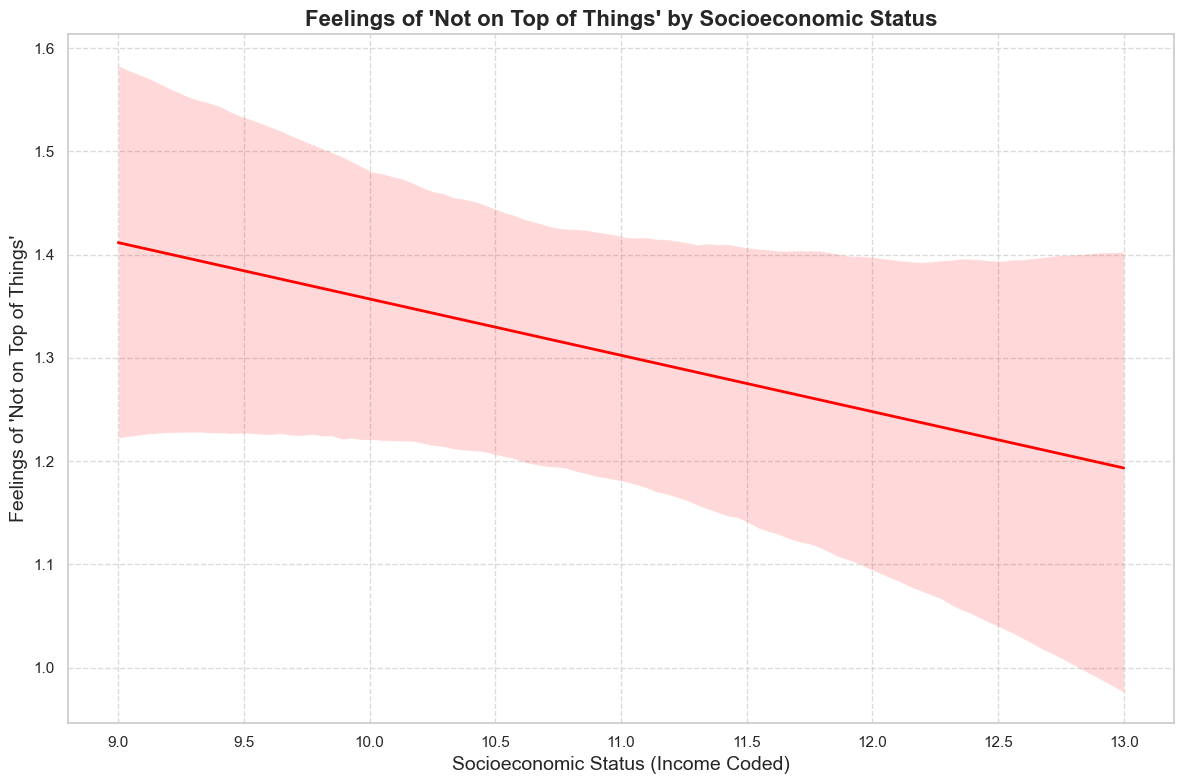

In [127]:
'''
Answering the question 
"How Does the Feeling of “Not Being on Top of Things” Vary by Socioeconomic Status?"
showing the feeling of 'Not on Top of Things' by Socioeconomic Status.
'''
# Drop any rows with NaN values in the relevant columns
regression_data = HMHRS_df[['income_coded', 'notontop']].dropna()
# Ensuring columns are numeric
regression_data['income_coded'] = pd.to_numeric(regression_data['income_coded'], errors='coerce')
regression_data['notontop'] = pd.to_numeric(regression_data['notontop'], errors='coerce')
# Dropping rows with NaN after conversion
regression_data = regression_data.dropna()
# Plot the scatter plot and regression line
plt.figure(figsize=(12, 8))
sns.regplot(data=regression_data,
             x='income_coded',
             y='notontop',
             color='red',
             scatter=False,
             line_kws={"linewidth": 2})
# Labeling and formatting of the visualization
plt.title("Feelings of 'Not on Top of Things' by Socioeconomic Status",
          fontsize=16,
          fontweight='bold')
plt.xlabel("Socioeconomic Status (Income Coded)", fontsize=14)
plt.ylabel("Feelings of 'Not on Top of Things'", fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Question - How Does the Feeling of “Stressed” Vary by Socioeconomic Status?

In [128]:
def min_max_normalize(series):
    """
    Min-Max normalization to scale the data between 0 and 1.
    """
    return (series - series.min()) / (series.max() - series.min())

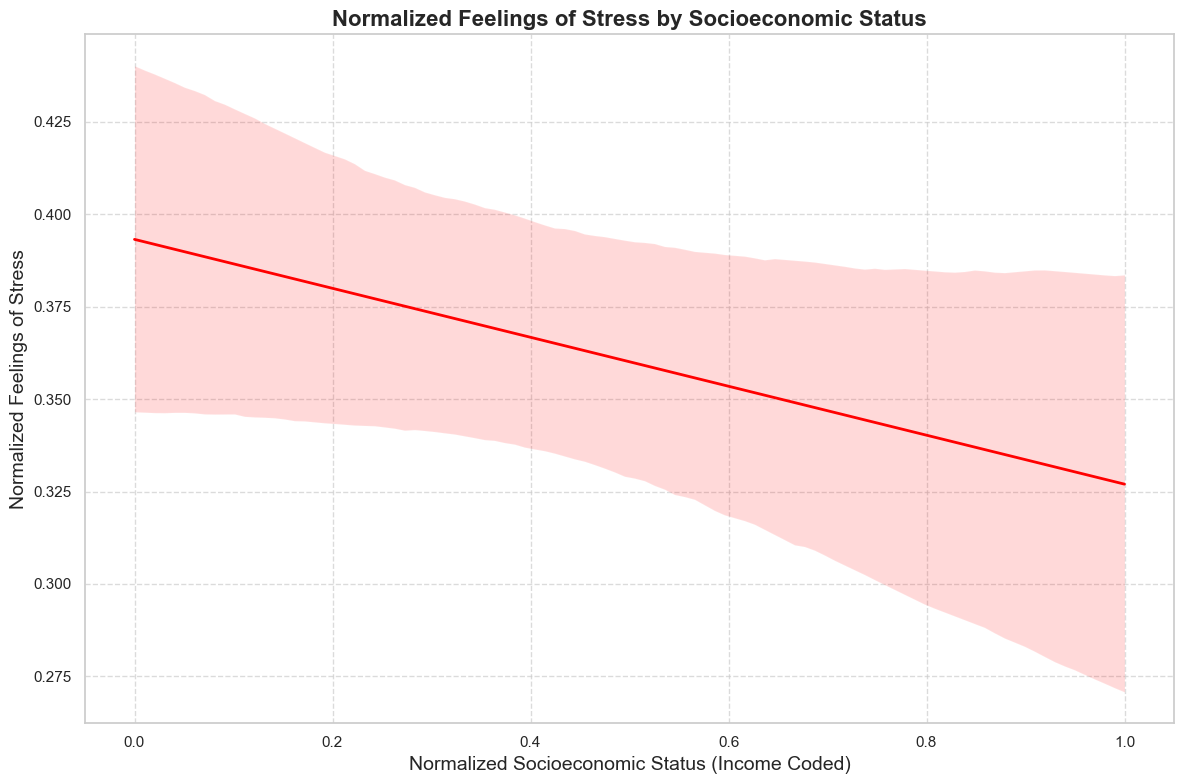

In [129]:
'''
Answering the question 
"How Does the Feeling of “Stressed” Vary by Socioeconomic Status?"
showing the feeling of 'Stressed' by Socioeconomic Status.
'''
# Apply min-max normalization
stress_data = HMHRS_df[['income_coded', 'stressed']].dropna()
# Ensure columns are numeric
stress_data['income_coded'] = pd.to_numeric(stress_data['income_coded'], errors='coerce')
stress_data['stressed'] = pd.to_numeric(stress_data['stressed'], errors='coerce')

stress_data = stress_data.dropna()
# Apply min-max normalization
stress_data['income_coded_normalized'] = min_max_normalize(stress_data['income_coded'])
stress_data['stress_normalized'] = min_max_normalize(stress_data['stressed'])
# Plotting the normalized scatter plot and regression line
plt.figure(figsize=(12, 8))
sns.regplot(data=stress_data,
            x='income_coded_normalized',
            y='stress_normalized',
            color='red',
            scatter=False,
            line_kws={"linewidth": 2})
# Labeling and formatting of the visualization
plt.title("Normalized Feelings of Stress by Socioeconomic Status",
           fontsize=16, fontweight='bold')
plt.xlabel("Normalized Socioeconomic Status (Income Coded)", fontsize=14)
plt.ylabel("Normalized Feelings of Stress", fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Question - How Does the Feeling of “Bad About Self” Vary by Socioeconomic Status?

/var/folders/8j/3f9m22_n54b36b71xwfq3fzw0000gn/T/ipykernel_96781/2854801557.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_means = filtered_data.groupby('SES_bin').mean()


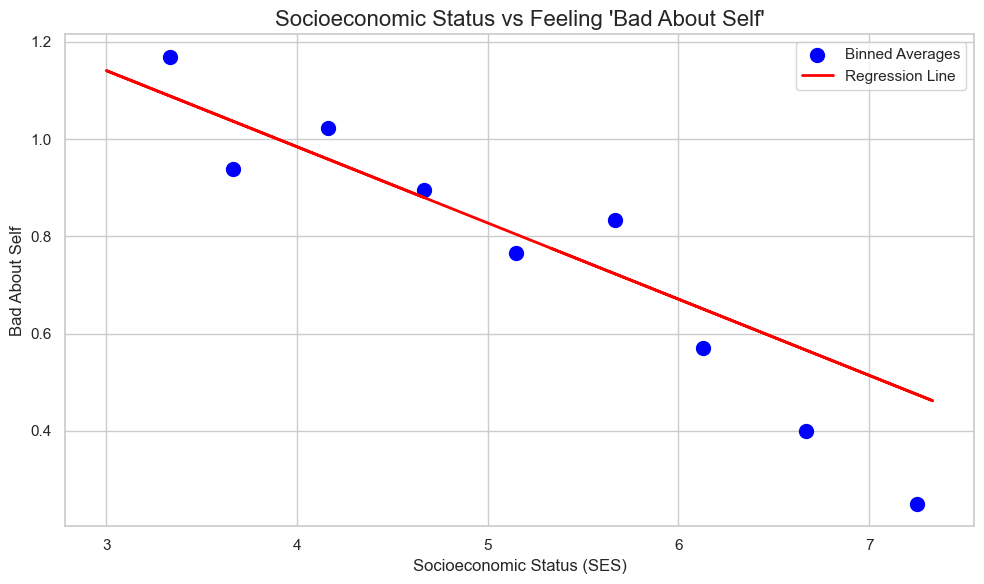

In [130]:
'''
Answering the question 
"How Does the Feeling of “Bad About Self” Vary by Socioeconomic Status?"
showing the feeling of 'Bad About Self' by Socioeconomic Status.
'''
# Load the dataset
data = pd.read_csv(FILENAME)
# Cleaning, converting, and using data in the dataset 
data.replace(" ", np.nan, inplace=True) 
data['income_coded'] = pd.to_numeric(data['income_coded'], errors='coerce')
data['phq6_badaboutself'] = pd.to_numeric(data['phq6_badaboutself'], errors='coerce')
# Convert education to numeric
data['education'] = data['education'].astype("category").cat.codes  
# Convert workstatus to numeric
data['workstatus'] = data['workstatus'].astype("category").cat.codes 
# Drop rows with missing values in the relevant columns
filtered_data = data[['income_coded', 'education', 'workstatus', 'phq6_badaboutself']].dropna()
filtered_data['SES'] = filtered_data[['income_coded', 'education', 'workstatus']].mean(axis=1)
# Define the independent variable (SES) and dependent variable (Bad about self)
X = filtered_data['SES'].values.reshape(-1, 1)
y = filtered_data['phq6_badaboutself']
model = LinearRegression()
model.fit(X, y)

# Predict the values
y_pred = model.predict(X)
bins = np.linspace(filtered_data['SES'].min(), filtered_data['SES'].max(), 10)
filtered_data['SES_bin'] = pd.cut(filtered_data['SES'], bins)
binned_means = filtered_data.groupby('SES_bin').mean()
sns.set(style="whitegrid")
# Plot for SES vs Bad About Self
plt.figure(figsize=(10, 6))
# Plot binned averages
plt.scatter(binned_means['SES'], binned_means['phq6_badaboutself'], 
            s=100, color='blue', label="Binned Averages")

# Adding the regression line
plt.plot(filtered_data['SES'], y_pred, color='red', lw=2, label="Regression Line")
# Labeling and formatting of the visualization
plt.title("Socioeconomic Status vs Feeling 'Bad About Self'", fontsize=16)
plt.xlabel("Socioeconomic Status (SES)", fontsize=12)
plt.ylabel("Bad About Self", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [131]:
# Function to calculate correlation between factors
def calculate_correlation(x, y):
    """
    Calculates the correlation between various factors in our data
    """
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)
    covariance = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    std_x = (sum((xi - mean_x) ** 2 for xi in x) / len(x)) ** 0.5
    std_y = (sum((yi - mean_y) ** 2 for yi in y) / len(y)) ** 0.5
    return covariance / (std_x * std_y)

In [132]:
# Correlation calculation
def compute_correlation(df, income_col, stress_col):
    """
    Computes the correlation between two columns in a DataFrame.
    """
    # Convert the specified columns to numeric, coercing errors to NaN
    df[income_col] = pd.to_numeric(df[income_col], errors='coerce')
    df[stress_col] = pd.to_numeric(df[stress_col], errors='coerce')
    
    # Drop rows with NaN values in the specified columns
    df = df.dropna(subset=[income_col, stress_col])
    
    # Extract the two columns
    income_list = df[income_col].tolist()
    stress_list = df[stress_col].tolist()
    
    # Use the calculate_correlation function to find the correlation
    correlation = calculate_correlation(income_list, stress_list)
    return correlation

# Calculating various correlations
income_stress = compute_correlation(HMHRS_df, 'income_coded', 'stressed')
print(f"Correlation between income and stress: {income_stress}")

age_stress = compute_correlation(HMHRS_df, 'stressed', 'age')
print(f"Correlation between stress and age: {gender_stress}")

education_mh = compute_correlation(HMHRS_df, 'HMHRS', 'education')
print(f"Correlation between mental health score and education level: {education_mh}")

income_hmhrs = compute_correlation(HMHRS_df, 'HMHRS', 'income_coded')
print(f"Correlation between mental health score and income: {income_hmhrs}")

age_hmhrs = compute_correlation(HMHRS_df, 'HMHRS', 'age')
print(f"Correlation between mental health score and education level: {age_hmhrs}")

Correlation between income and stress: -33.011951448241746
Correlation between stress and age: -93.17949549993779
Correlation between mental health score and education level: -46.112400100617855
Correlation between mental health score and income: -63.930155537177455
Correlation between mental health score and education level: -106.3480837199253
